# Tarea 2
## Importación de módulos

In [1117]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from IPython.display import display
import matplotlib.pyplot as plt


## Clase del problema

In [1118]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3,#Cantidad de genes por cromosoma
                        n_obj=2,#cantidad de funciones objetivo
                        xl=0,#Limite inferior del valor del gen
                        xu=200)#Limite superior del valor de gen
        
    def _evaluate(self, x, out, *args, **kwargs):
        
        # Cantidad de tornos
        T = x[0]
        # Cantidad de fresadoras
        F = x[1]
        # Cantidad de multiproposito
        M = x[2]
        
        #Se definen las penalizaciones por el sobrepaso de material 
        penCab = 280 - (2*T+F+5*M)#Cableado
        penM  = 120 - (6*T+3*F+12*M)#Motores
        penCar = 670 - (2*T+8*F+4*M)#Carcasas
        penA = 250 - (2*T+6*F+6*M)#Actuadores
        
        penalizaciones = [penCab, penM, penCar, penA] #Vector con las penalizaciones
        
        pen = 0
        #Sumatoria de penalizaciones
        for i in range(4):
            if penalizaciones[i] < 0:
                pen = pen + penalizaciones[i]
        
        #Funciones objetivo
        f1 = -(4*T+8*F+12*M)+pen**2 #Funcion que busca la mayor ganancia
        f2 = (abs(T-F)+abs(T-M)+abs(F-M))**3 #Funcion que busca la cantidad de unidades sea uniforme
        out["F"] = [f1, f2]
        
problem = MyProblem()    

## Inicialización del algoritmo

In [1119]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.crossover.pntx import SinglePointCrossover

# Se utiliza el algoritmo NSGA2 
#Automaticamente se utiliza un el algoritmo de torneo para la selección del cruzamiento
algorithm = NSGA2(pop_size=200,#Numero de la poblacion inicial 
                sampling=IntegerRandomSampling(),
                crossover=SinglePointCrossover(),
                mutation=PM(prob=0.05, vtype=float, repair=RoundingRepair()),#Mutacion
                eliminate_duplicates = True)

## Criterio de parada

In [1120]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 100)#Cantidad de generaciones

## Optimización

In [1121]:
from pymoo.optimize import minimize
#Se utiliza una funcion de minimización para minimizar las funciones objetivo
res = minimize(problem,
            algorithm,
            termination,
            save_history=True,
            verbose=True)

X = res.X #Vector de soluciones
res.F = res.F*-1
F = res.F #Vector con las calidades de cada individuo
hist = res.history
#len(F)
F


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      200 |      4 |             - |             -
     2 |      400 |      3 |  0.1750599520 |         ideal
     3 |      600 |      5 |  0.0073156682 |         ideal
     4 |      800 |      6 |  0.0118397086 |         ideal
     5 |     1000 |      3 |  0.0714285714 |         ideal
     6 |     1200 |      5 |  0.2222222222 |         ideal
     7 |     1400 |      8 |  0.0270270270 |         nadir
     8 |     1600 |     10 |  0.0136860658 |             f
     9 |     1800 |     10 |  0.0136340581 |             f
    10 |     2000 |     13 |  0.0263435546 |             f
    11 |     2200 |     16 |  0.9880035665 |         nadir
    12 |     2400 |     18 |  5.831250E+01 |         nadir
    13 |     2600 |     22 |  0.0055697199 |             f
    14 |     2800 |     23 |  0.0116047926 |             f
    15 |     3000 |     24 |  0.0002003205 |             f
    16 |     3200 |     24 |  0.0021374719 |            

array([[ 2.48000e+02, -1.25000e+05],
       [ 2.80000e+02, -2.62144e+05],
       [ 2.56000e+02, -1.40608e+05],
       [ 2.04000e+02, -2.70000e+04],
       [ 1.96000e+02, -2.19520e+04],
       [ 2.60000e+02, -1.75616e+05],
       [ 2.16000e+02, -4.66560e+04],
       [ 1.96000e+02, -2.19520e+04],
       [ 2.60000e+02, -1.75616e+05],
       [ 2.68000e+02, -1.95112e+05],
       [ 1.92000e+02, -1.38240e+04],
       [ 2.28000e+02, -7.40880e+04],
       [ 2.72000e+02, -2.38328e+05],
       [ 1.60000e+02, -1.00000e+03],
       [ 2.36000e+02, -8.51840e+04],
       [ 2.12000e+02, -3.93040e+04],
       [ 1.48000e+02, -2.16000e+02],
       [ 3.08000e+02, -4.38976e+05],
       [ 1.64000e+02, -2.74400e+03],
       [ 2.16000e+02, -4.66560e+04],
       [ 1.20000e+02, -0.00000e+00],
       [ 2.28000e+02, -7.40880e+04],
       [ 1.84000e+02, -1.06480e+04],
       [ 2.88000e+02, -2.87496e+05],
       [ 1.72000e+02, -4.09600e+03],
       [ 2.24000e+02, -5.48720e+04],
       [ 1.76000e+02, -8.00000e+03],
 

## Convergencia de Cada Objetivo

In [1122]:
from pymoo.indicators.hv import HV
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)#Normalización del frente de Pareto
A = nF[::7] # se toma una muestra del frente cada 7 soluciones
display(A)
ref_point = np.array([1.2, 1.2]) # se pone el punto de referencia (un punto muy malo) como -120 para f1 y 6000 para f2 

ind = HV(ref_point=ref_point) # se calcula el indicador del hypervolumen
print("HV", '%.5f' % ind(A)) # se imprime el indicador con cinco decimales


array([[0.64      , 0.75585938],
       [0.38      , 0.957125  ],
       [0.58      , 0.833625  ],
       [0.54      , 0.85529687],
       [0.1       , 0.99998438]])

HV 0.37935


## Visualización de Resultados

array([[ 2.48000e+02, -1.25000e+05],
       [ 2.80000e+02, -2.62144e+05],
       [ 2.56000e+02, -1.40608e+05],
       [ 2.04000e+02, -2.70000e+04],
       [ 1.96000e+02, -2.19520e+04],
       [ 2.60000e+02, -1.75616e+05],
       [ 2.16000e+02, -4.66560e+04],
       [ 1.96000e+02, -2.19520e+04],
       [ 2.60000e+02, -1.75616e+05],
       [ 2.68000e+02, -1.95112e+05],
       [ 1.92000e+02, -1.38240e+04],
       [ 2.28000e+02, -7.40880e+04],
       [ 2.72000e+02, -2.38328e+05],
       [ 1.60000e+02, -1.00000e+03],
       [ 2.36000e+02, -8.51840e+04],
       [ 2.12000e+02, -3.93040e+04],
       [ 1.48000e+02, -2.16000e+02],
       [ 3.08000e+02, -4.38976e+05],
       [ 1.64000e+02, -2.74400e+03],
       [ 2.16000e+02, -4.66560e+04],
       [ 1.20000e+02, -0.00000e+00],
       [ 2.28000e+02, -7.40880e+04],
       [ 1.84000e+02, -1.06480e+04],
       [ 2.88000e+02, -2.87496e+05],
       [ 1.72000e+02, -4.09600e+03],
       [ 2.24000e+02, -5.48720e+04],
       [ 1.76000e+02, -8.00000e+03],
 

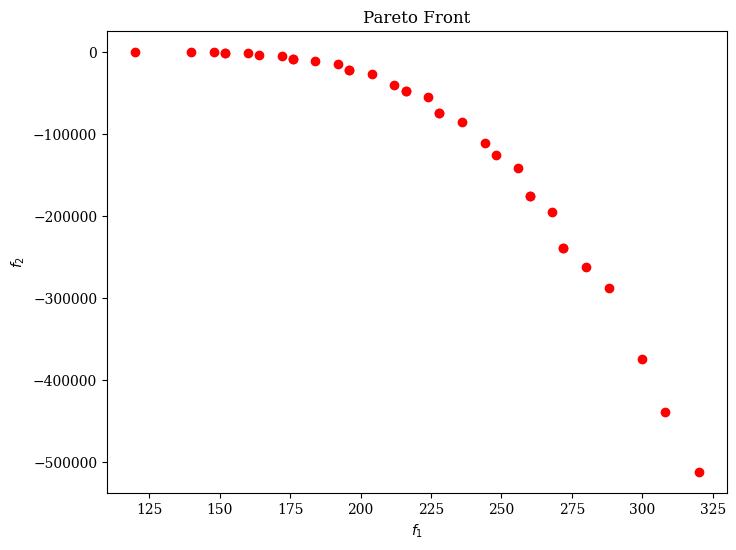

In [1123]:

from pymoo.visualization.scatter import Scatter
plot = Scatter(title="Pareto Front")
plot.add(res.F, color="red")
display(res.F)
plot.show()

In [1124]:
len(X)

35

In [1125]:
X[:]

array([[ 2, 27,  2],
       [ 1, 33,  1],
       [ 2, 28,  2],
       [ 3, 18,  4],
       [ 3, 17,  4],
       [ 0, 28,  3],
       [ 2, 20,  4],
       [ 2, 16,  5],
       [ 1, 29,  2],
       [ 1, 30,  2],
       [ 4, 16,  4],
       [ 1, 22,  4],
       [ 0, 31,  2],
       [ 5, 10,  5],
       [ 2, 24,  3],
       [ 4, 20,  3],
       [ 6,  8,  5],
       [ 1, 38,  0],
       [ 4, 11,  5],
       [ 3, 21,  3],
       [ 5,  5,  5],
       [ 2, 23,  3],
       [ 4, 15,  4],
       [ 1, 34,  1],
       [ 4, 12,  5],
       [ 3, 22,  3],
       [ 2, 12,  6],
       [ 5,  9,  5],
       [ 5,  6,  6],
       [ 3, 26,  2],
       [ 0, 36,  1],
       [ 0, 40,  0],
       [ 3, 13,  5],
       [ 4,  8,  6],
       [ 1, 32,  1]])

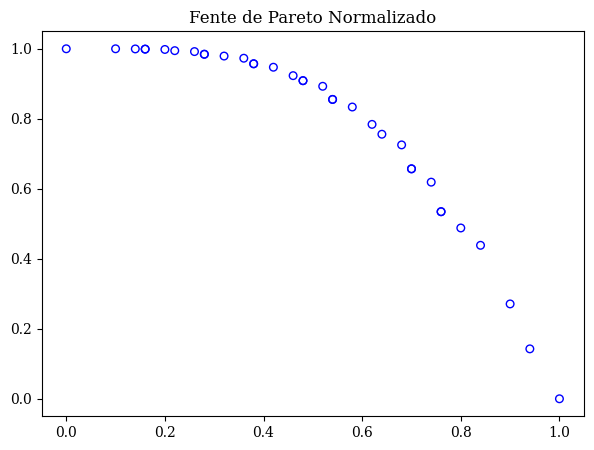

In [1126]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)#Normalización del frente de Pareto
plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Fente de Pareto Normalizado")
plt.show()

## Mejor resultado por medio de Compromise Programing 

Best regarding ASF: Point 
i = 5
F = [    260. -175616.]
X = [ 0 28  3]


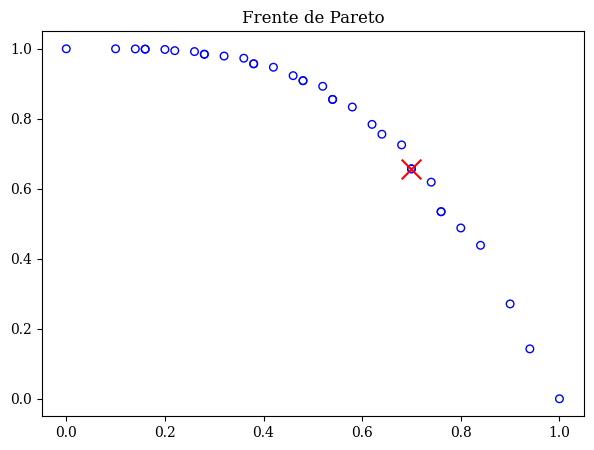

In [1127]:
from pymoo.decomposition.asf import ASF


weights = np.array([0.5, 0.5])#Peso que determina la importacia de las soluciones
decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()
print("Best regarding ASF: Point \ni = %s\nF = %s\nX = %s" % (i, F[i], X[i]))

#Se grafica el resultado
plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(nF[i, 0], nF[i, 1], marker="x", color="red", s=200)
plt.title("Frente de Pareto")
plt.show()

# Referencias

#### https://pymoo.org/getting_started/index.html
#### https://pymoo.org/customization/discrete.html
#### https://pymoo.org/interface/problem.html
